In [1]:
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

Bag of words prototype on a small sample of the data

In [11]:
def folder_list_pd(paths,file_list,num=5000): #take num files
    '''
    Return dataframe with texts
    Pass num=None to use all files.
    '''
    appeals = []
    files = []
    count = 0
    for infile in file_list[0:num]:
        count += 1
        if count % 1000 == 0:
            print('done with ' + str(count))
        read_ok = False
        for path in paths:
            file = os.path.join(path,infile)
            try:
                with open(file) as f:
                    lines = f.read().strip().replace('\n',' ').replace('\t', ' ')
                    appeals.append(lines)
                    files.append(str(infile))
                    read_ok = True
                    break
            except:
                continue
        if not read_ok:
            print("WARNING: Could not find " + infile + " in any of the given paths")

    appeals_df = pd.DataFrame(columns = ['Text','File'])
    appeals_df.Text = appeals
    appeals_df.File = files
    
    return appeals_df

In [4]:
def match_target(data):
    '''
    Add target variable
    '''
    keys = pd.read_csv('file_target.csv')
    merged = data.merge(keys, on='File', how='left')
    merged.drop(['File','Unnamed: 0'], axis =1,inplace=True)
    
    return merged

In [5]:
if __name__ == '__main__':
    path = 'text_appeals'
    file_id = list(pd.read_csv('file_target.csv').File)
    appeals = folder_list_pd(path,file_id)
    merged = match_target(appeals)
    X = pd.DataFrame(merged['Text'])
    Y = pd.DataFrame(merged['Y'])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

done with 1000
done with 2000
done with 3000
done with 4000
done with 5000


In [7]:
#Read map from file to outcome
file_id = list(pd.read_csv('file_target.csv').File)
print(len(file_id))

35232


In [12]:
#Read appeals into a dataframe
paths = ['text_appeals', 
          'NY-Appellate-Scraping/raw data/courtdoc-2017/txt',
         'NY-Appellate-Scraping/raw data/courtdoc-2015-2016/txt']
         
appeals = folder_list_pd(paths,file_id, None)
appeals.to_csv('consolidated_appeals.csv')
print(len(appeals))

done with 1000
done with 2000
done with 3000
done with 4000
done with 5000
done with 6000
done with 7000
done with 8000
done with 9000
done with 10000
done with 11000
done with 12000
done with 13000
done with 14000
done with 15000
done with 16000
done with 17000
done with 18000
done with 19000
done with 20000
done with 21000
done with 22000
done with 23000
done with 24000
done with 25000
done with 26000
done with 27000
done with 28000
done with 29000
done with 30000
done with 31000
done with 32000
done with 33000
done with 34000
done with 35000
35232


In [15]:
#Match appeals to outcomes
merged = match_target(appeals)
merged.head()

,Text,Y
0,People v Branch 2003 NY Slip Op 18059 [1 AD3d...,1
1,People v Brunson 2003 NY Slip Op 18060 [1 AD3...,0
2,People v Cabrera 2003 NY Slip Op 18061 [1 AD3...,0
3,People v Deeds 2003 NY Slip Op 18062 [1 AD3d ...,0
4,People v Felix 2003 NY Slip Op 18063 [1 AD3d ...,0


In [16]:
#Split into test and train
X = pd.DataFrame(merged['Text'])
Y = pd.DataFrame(merged['Y'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [17]:
merged.to_csv('merged.csv')

### Read data from file

In [87]:
merged = pd.read_csv('merged.csv')

X = pd.DataFrame(merged['Text'])
Y = pd.DataFrame(merged['Y'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Models including all words
This will create leakage as outcome is included in the training set. However, it is still useful for the first iteration to ensure the model works as expected

In [88]:
#Create vectorizers
count_vect = CountVectorizer(min_df=1, stop_words='english', binary='True')

#Convert a collection of text documents to a matrix of token counts
X_vect = count_vect.fit(X_train['Text'])

#Transform the training and test data to sparse format
vect_train = X_vect.transform(X_train['Text'])
vect_test = X_vect.transform(X_test['Text'])

In [89]:
#See the vocabulary
X_vect.vocabulary_

{'people': 46291,
 'dennis': 25382,
 '2007': 11778,
 'ny': 44437,
 'slip': 54010,
 'op': 44957,
 '03712': 3625,
 '39': 12734,
 'ad3d': 14872,
 '875': 14172,
 'april': 16394,
 '24': 12109,
 'appellate': 16296,
 'division': 26622,
 'second': 52592,
 'department': 25441,
 'published': 48321,
 'new': 43735,
 'york': 61509,
 'state': 54999,
 'law': 38718,
 'reporting': 50174,
 'bureau': 20067,
 'pursuant': 48450,
 'judiciary': 36795,
 '431': 12880,
 'corrected': 23574,
 'wednesday': 60495,
 'june': 36846,
 'respondent': 50356,
 'antwon': 16220,
 'appellant': 16294,
 'auburn': 17082,
 'pro': 47928,
 'se': 52524,
 'charles': 21479,
 'hynes': 34408,
 'district': 26565,
 'attorney': 17056,
 'brooklyn': 19777,
 'leonard': 39065,
 'joblove': 36614,
 'camille': 20472,
 'hara': 33033,
 'gillespie': 31708,
 'counsel': 23692,
 'application': 16323,
 'writ': 61257,
 'error': 28552,
 'coram': 23470,
 'nobis': 43959,
 'vacate': 59241,
 'ground': 32459,
 'ineffective': 35137,
 'assistance': 16895,
 'deci

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [59]:

def plot_roc(actual,forecast,name):
    
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(actual, forecast)

    #AUC
    aucc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = name + ' AUC: '+str(round(aucc, 4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.grid(True)
    plt.legend(loc = 'lower right', title='AUC')



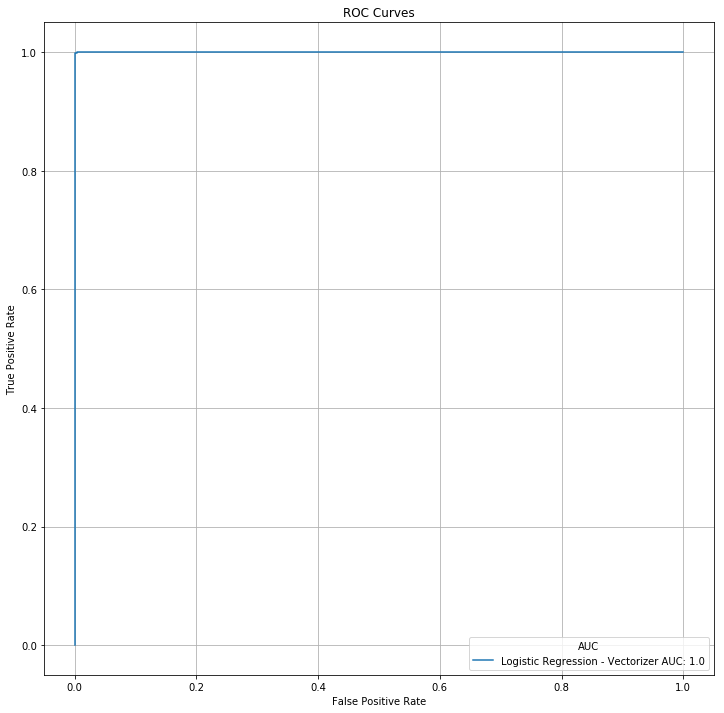

In [24]:

#Fitting logistic regression to vectorizer
logistic = LogisticRegression(random_state=33)

logistic.fit(vect_train, Y_train['Y'])
logistic_vect_fcst = logistic.predict_proba(vect_test)[:,1]

    
plot_roc(Y_test, logistic_vect_fcst,'Logistic Regression - Vectorizer')


In [22]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\tAffirmed\t\t\tModified")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [26]:
show_most_informative_features(X_vect,logistic)

	Affirmed			Modified
	-5.7699	affirmed       		9.1508	dismissed      
	-1.1305	unanimously    		8.3089	modified       
	-0.9992	county         		6.1582	reversed       
	-0.8210	ordered        		1.6099	vacating       
	-0.8078	court          		1.0101	remitted       
	-0.6961	appealed       		0.8971	modify         
	-0.5852	perceive       		0.8690	reducing       
	-0.4606	defendant      		0.8411	concede        
	-0.4531	460            		0.7917	nobis          
	-0.4247	decline        		0.7851	coram          
	-0.4168	concur         		0.7375	writ           
	-0.4000	degree         		0.6338	dismissing     
	-0.3738	withdraw       		0.6183	matter         
	-0.3147	reviewed       		0.6081	extent         
	-0.3138	costs          		0.5870	reargument     
	-0.2951	final          		0.5857	barnes         
	-0.2923	judgment       		0.5742	affirming      
	-0.2838	crawford       		0.5739	indicated      
	-0.2758	extraordinary  		0.5737	withdrawn      
	-0.2743	suitte         		0.5563	shall          

###  Bag of words excluding leakage

In [5]:
#Clean keywords
X_train_ex = X_train.Text.replace(['affirmed|dismissed|modified|reversed'],'', regex=True)
X_test_ex = X_test.Text.replace(['affirmed|dismissed|modified|reversed'],'', regex=True)

In [28]:
#Create vectorizers
count_vect_ex = CountVectorizer(min_df=1, stop_words='english', binary='True')

#Convert a collection of text documents to a matrix of token counts
X_vect_ex = count_vect_ex.fit(X_train_ex)

#Transform the training and test data to sparse format
vect_train_ex = X_vect_ex.transform(X_train_ex)
vect_test_ex = X_vect_ex.transform(X_test_ex)

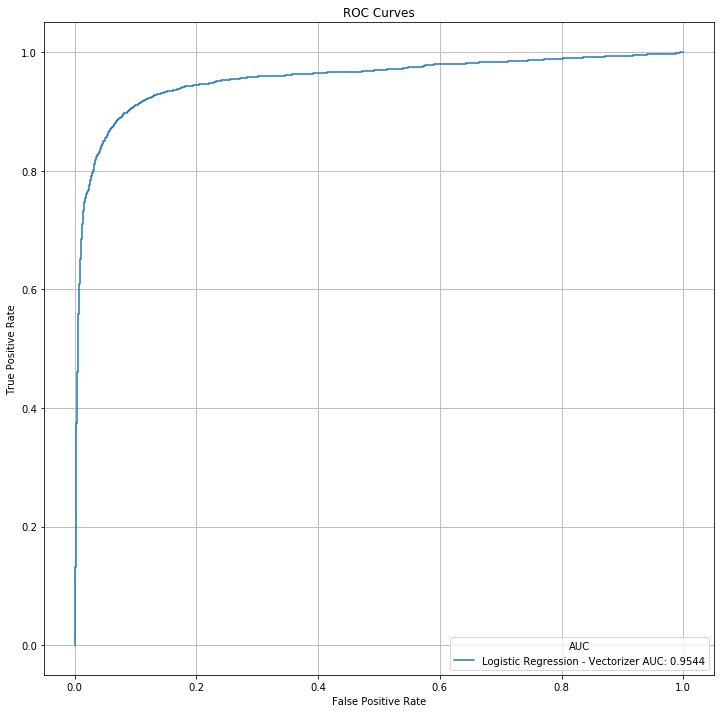

In [29]:
#Fitting logistic regression to vectorizer
logistic_ex = LogisticRegression(random_state=33)

logistic_ex.fit(vect_train_ex, Y_train['Y'])
logistic_vect_fcst_ex = logistic_ex.predict_proba(vect_test_ex)[:,1]
   
plot_roc(Y_test, logistic_vect_fcst_ex,'Logistic Regression - Vectorizer')


In [46]:
show_most_informative_features(X_vect_ex,logistic_ex,50)

	Affirmed			Modified
	-2.3417	appealed       		4.4768	vacating       
	-2.3358	perceive       		3.1807	remitted       
	-2.0123	county         		2.9780	remanded       
	-1.8434	unanimously    		2.7010	dismissing     
	-1.5937	ordered        		2.6606	modify         
	-1.5313	460            		2.6342	moot           
	-1.5116	reserved       		2.6306	superseded     
	-1.4779	court          		2.6026	reducing       
	-1.2446	crawford       		2.5717	concede        
	-1.2197	suitte         		2.2593	academic       
	-1.1515	final          		1.9347	said           
	-1.1505	decline        		1.8963	vacated        
	-1.1421	concur         		1.8858	reverse        
	-1.1159	631            		1.7746	remanding      
	-1.1047	theodore       		1.6794	insofar        
	-1.0798	specified      		1.6495	reinstated     
	-1.0257	discern        		1.6450	deported       
	-1.0132	935            		1.6015	lies           
	-0.9742	extraordinary  		1.5225	reversing      
	-0.9608	judgments      		1.5154	granted        

### Bi-gram Bag of Words

In [31]:
#Create vectorizers
count_vect_bi = CountVectorizer(min_df=1, stop_words='english', ngram_range=(2, 2), binary='True')

#Convert a collection of text documents to a matrix of token counts
X_vect_bi = count_vect_bi.fit(X_train_ex)

#Transform the training and test data to sparse format
vect_train_bi = X_vect_bi.transform(X_train_ex)
vect_test_bi = X_vect_bi.transform(X_test_ex)

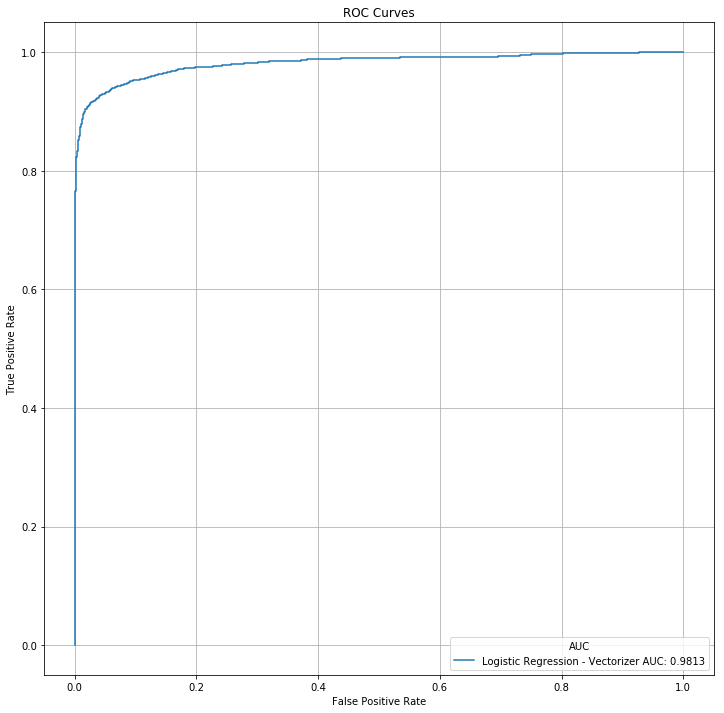

In [32]:
#Fitting logistic regression to vectorizer
logistic_bi = LogisticRegression(random_state=33)

logistic_bi.fit(vect_train_bi, Y_train['Y'])
logistic_vect_fcst_bi = logistic_bi.predict_proba(vect_test_bi)[:,1]
   
plot_roc(Y_test, logistic_vect_fcst_bi,'Logistic Regression - Vectorizer')

In [47]:
show_most_informative_features(X_vect_bi,logistic_bi,50)

	Affirmed			Modified
	-2.1308	ordered judgment		4.2577	unanimously law
	-2.0536	appealed unanimously		3.2176	judgment law   
	-1.5627	unanimously memorandum		2.2966	ordered appeal 
	-1.4790	appellant judgment		1.7605	new trial      
	-1.3114	judgment appealed		1.6866	order law      
	-1.1348	unanimously present		1.6696	lv ny3d        
	-1.0471	ordered order  		1.6057	matter remitted
	-1.0178	respondent judgment		1.6013	discretion justice
	-0.9977	unanimously opinion		1.5795	matter discretion
	-0.9850	unanimously verdict		1.5055	law extent     
	-0.8696	order costs    		1.4348	ordered said   
	-0.8504	county court   		1.4247	extent indicated
	-0.8207	unanimously costs		1.2782	law vacating   
	-0.7783	460 50         		1.2724	appellant motion
	-0.7261	unanimously counsel		1.2722	denied present 
	-0.7192	ordered judgments		1.2442	unanimously matter
	-0.7028	unanimously defendant		1.1799	said appeal    
	-0.6779	supreme court  		1.1553	law matter     
	-0.6568	excessive ordered		1.1541	vaca

### 3-Gram

In [40]:
#Create vectorizers
count_vect_tri = CountVectorizer(min_df=1, stop_words='english', ngram_range=(3, 3), binary='True')

#Convert a collection of text documents to a matrix of token counts
X_vect_tri = count_vect_tri.fit(X_train_ex)

#Transform the training and test data to sparse format
vect_train_tri = X_vect_tri.transform(X_train_ex)
vect_test_tri = X_vect_tri.transform(X_test_ex)

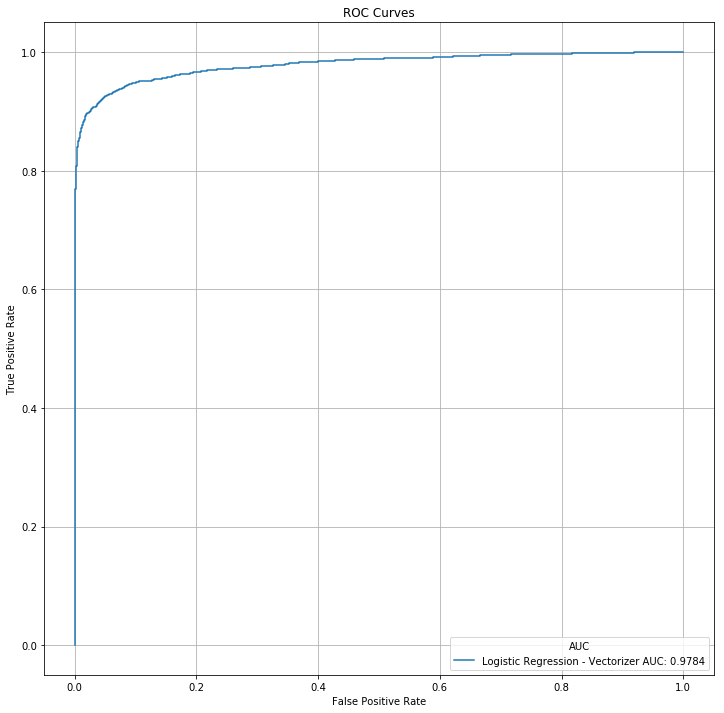

In [41]:
#Fitting logistic regression to vectorizer
logistic_tri = LogisticRegression(random_state=33)

logistic_tri.fit(vect_train_tri, Y_train['Y'])
logistic_vect_fcst_tri = logistic_tri.predict_proba(vect_test_tri)[:,1]
   
plot_roc(Y_test, logistic_vect_fcst_tri,'Logistic Regression - Vectorizer')

In [42]:
show_most_informative_features(X_vect_tri,logistic_tri)

	Affirmed			Modified
	-2.5007	appealed unanimously memorandum		3.4983	ordered judgment law
	-1.9178	ordered judgment appealed		2.6712	unanimously law extent
	-1.8964	appealed unanimously present		2.4940	appealed unanimously law
	-1.5881	judgment appealed unanimously		2.4469	matter discretion justice
	-1.2550	concur ordered judgment		2.2767	years unanimously law
	-1.1990	unanimously opinion order		1.8202	unanimously matter discretion
	-1.1718	ordered order costs		1.5687	ordered said appeal
	-1.0669	appellant judgment supreme		1.4228	ordered order law
	-0.9772	unanimously memorandum defendant		1.4065	law extent vacating
	-0.8832	appealed unanimously costs		1.2673	remitted county court
	-0.8217	unanimously court properly		1.2013	matter remitted county
	-0.7978	new york respondent		1.1861	excessive extent indicated
	-0.7874	years unanimously defendant		1.1542	people correctly concede
	-0.7872	ordered judgment defendant		1.1335	appeal judgment supreme
	-0.7830	opinion order filed		1.1168	ne

#### TF-IDF

In [6]:
#Create vectorizers
tfidf = TfidfVectorizer(min_df=1, stop_words='english', binary='True')

#Convert a collection of text documents to a matrix of token counts
X_tfidf = tfidf.fit(X_train_ex)

#Transform the training and test data to sparse format
tfidf_train = X_tfidf.transform(X_train_ex)
tfidf_test = X_tfidf.transform(X_test_ex)

In [8]:
#tfidf.get_stop_words()

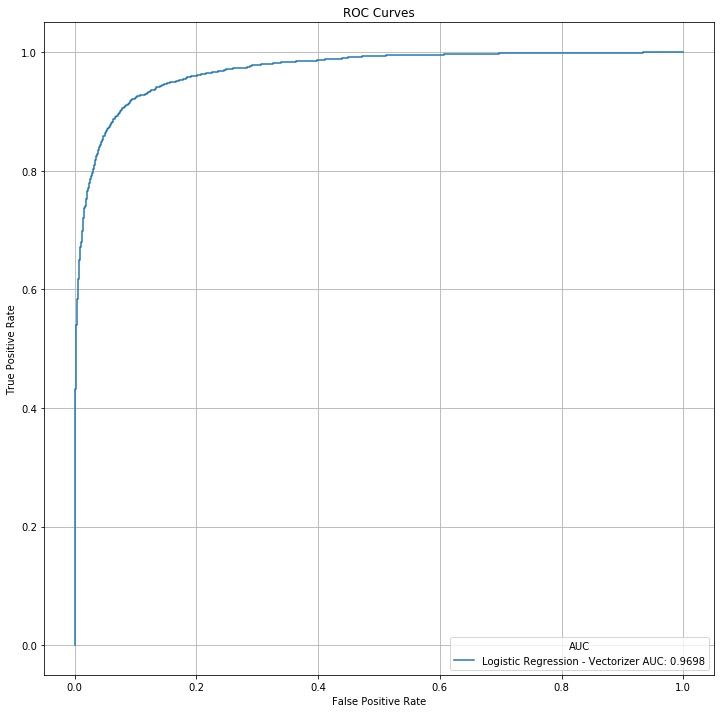

In [35]:
#Fitting logistic regression to vectorizer
logistic_tf = LogisticRegression(random_state=33)

logistic_tf.fit(tfidf_train, Y_train['Y'])
logistic_tf_fcst = logistic_tf.predict_proba(tfidf_test)[:,1]
   
plot_roc(Y_test, logistic_tf_fcst,'Logistic Regression - Vectorizer')

In [44]:
show_most_informative_features(X_tfidf,logistic_tf,50)

	Affirmed			Modified
	-6.2420	appealed       		11.7781	vacating       
	-5.0623	properly       		10.3956	matter         
	-3.8126	unanimously    		10.3893	remitted       
	-3.6848	perceive       		8.3883	concede        
	-3.5033	decline        		7.6795	modify         
	-3.4079	contention     		7.3620	vacated        
	-3.0038	unpreserved    		6.6092	dismissing     
	-2.9327	merit          		6.0369	reducing       
	-2.7871	affirm         		6.0362	extent         
	-2.7512	ordered        		6.0011	reargument     
	-2.7083	withdraw       		5.7373	nobis          
	-2.6358	review         		5.7181	coram          
	-2.6148	reject         		5.6848	writ           
	-2.6135	judgment       		5.6189	remanded       
	-2.5889	county         		5.5055	indicated      
	-2.5471	lv             		5.3288	said           
	-2.5129	contrary       		5.2796	indictment     
	-2.4421	ny2d           		5.0865	accordingly    
	-2.4337	event          		4.8928	reverse        
	-2.3841	460            		4.8305	error       

### Clarification on meaning of Penal Law articles that were significant
460 - Enterprise Corruption - organized crime
38 - 


#### TFIDF Bigram

In [86]:
#Create vectorizers
tfidf_bi = TfidfVectorizer(min_df=1, stop_words='english', ngram_range=(2, 2), binary='True')

#Convert a collection of text documents to a matrix of token counts
X_tfidf_bi = tfidf_bi.fit(X_train_ex)

#Transform the training and test data to sparse format
tfidf_train_bi = X_tfidf_bi.transform(X_train_ex)
tfidf_test_bi = X_tfidf_bi.transform(X_test_ex)

In [84]:
#Fitting logistic regression to vectorizer
logistic_tf_bi = LogisticRegression(random_state=33, C= 0.7)

logistic_tf_bi.fit(tfidf_train_bi, Y_train['Y'])
logistic_tf_fcst_bi = logistic_tf_bi.predict_proba(tfidf_test_bi)[:,1]
   
plot_roc(Y_test, logistic_tf_fcst_bi,'Logistic Regression - Vectorizer')
plt.show()

In [85]:
show_most_informative_features(X_tfidf_bi,logistic_tf_bi,50)

	Affirmed			Modified
	-5.3587	unanimously memorandum		10.4805	unanimously law
	-4.6921	ordered judgment		7.7742	judgment law   
	-3.9116	appealed unanimously		7.7429	matter remitted
	-3.7168	judgment appealed		5.4151	new trial      
	-3.6355	court properly 		5.3844	discretion justice
	-3.0443	appellant judgment		5.3292	matter discretion
	-2.8859	appeal defendant		4.7432	denied present 
	-2.8435	defendant contention		4.6623	appellant motion
	-2.7881	contrary defendant		4.4871	vacating sentence
	-2.7850	unanimously present		4.2649	ordered said   
	-2.6835	imposing sentence		4.2607	law vacating   
	-2.6276	judgment defendant		4.2160	judgment matter
	-2.6067	properly denied		4.1388	coram nobis    
	-2.5568	sentence ordered		4.1276	writ error     
	-2.5453	plea guilty    		4.1276	error coram    
	-2.5162	supreme court  		4.1090	law extent     
	-2.4676	division department		4.0950	law matter     
	-2.4626	respondent appeal		4.0441	remitted county
	-2.4209	unanimously court		4.0060	extent ind

In [51]:
def show_most_informative_features_int(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    feature_names = filter(None, list(map(lambda x: select_num(x), feature_names)))
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\tAffirmed\t\t\tModified")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [55]:
def select_num(val):
    print(val)
    try: 
        int(val)
        print(val)
        return val
    except ValueError:
        pass